# Community Feature Calculation

Generation of a simple set of community-level features, based on relative comparisons between community-induced subgraphs and the full network. We use various LFR networks to demonstrate.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from communityfeatures import *
from netutil import *
%matplotlib inline

Settings

In [2]:
dir_data = "../../LFR_Graphs/"
pd.set_option('precision', 3)

In [3]:
feature_ids = [ "relative_density", "relative_degree", "relative_between", "relative_closeness",
            "cut", "conductance", "internal_external", "relative_pathlength" ]

### Data Loading

Find network edgelist files:

In [4]:
networks, communities = find_all_networks( dir_data )
print("Loaded %d networks" % len(networks))

Loaded 20 networks


Summarise the networks:

In [5]:
rows = []
for network_id in networks:
    row = { "network_id" : network_id, 
           "nodes" : networks[network_id].number_of_nodes(), "edges" : networks[network_id].number_of_edges(),
          "communities" : len(communities[network_id])}
    rows.append( row )
df_networks = pd.DataFrame(rows).set_index("network_id")
df_networks

,nodes,edges,communities
network_id,,,
graph_01_mu_0_1,200,756,8
graph_02_mu_0_1,200,778,8
graph_05_mu_0_1,200,850,8
graph_04_mu_0_1,200,797,8
graph_03_mu_0_1,200,841,8
graph_01_mu_0_3,200,811,7
graph_02_mu_0_3,200,849,8
graph_05_mu_0_3,200,893,9
graph_04_mu_0_3,200,786,8


### Network Evaluation Code

In [6]:
def create_generators( g ):
    generators = {}
    for fid in feature_ids:
        generators[fid] = get_feature_generator( fid, g )
    return generators

In [7]:
def evaluate_communities( g, community_set ):
    generators = create_generators( g )
    # apply the measures
    rows = []
    for comm_id in community_set:
        comm = community_set[comm_id]
        # generate features
        row = { "community" : comm_id, "size" : len(comm) }
        for fid in feature_ids:
            row[fid] = generators[fid].evaluate( comm )
        rows.append(row)
    # create the Data Frame
    columns = [ "community", "size" ] + feature_ids
    return pd.DataFrame(rows, columns=columns).set_index("community").sort_index()

### Single Network Experiment (1)

In [8]:
network_id = "graph_01_mu_0_1"
g = networks[network_id]

Evaluate each community individually

In [9]:
df = evaluate_communities( networks[network_id], communities[network_id] )
df

,size,relative_density,relative_degree,relative_between,relative_closeness,cut,conductance,internal_external,relative_pathlength
community,,,,,,,,,
0,32,6.528,6.528,2.278,1.847,0.007,0.125,0.871,0.544
1,22,7.521,7.521,3.696,1.775,0.006,0.143,0.851,0.564
2,26,7.046,7.046,2.922,1.828,0.006,0.143,0.850,0.551
3,30,6.233,6.233,2.725,1.759,0.005,0.120,0.878,0.573
4,22,7.977,7.977,3.433,1.842,0.005,0.130,0.861,0.546
5,22,7.749,7.749,3.414,1.847,0.006,0.150,0.842,0.544
6,24,7.248,7.248,3.426,1.771,0.006,0.151,0.842,0.569
7,22,6.495,6.495,4.146,1.693,0.007,0.186,0.806,0.596


To what extent are these features correlated?

In [10]:
df_corr = df.drop(["size"], axis=1).corr()
df_corr

,relative_density,relative_degree,relative_between,relative_closeness,cut,conductance,internal_external,relative_pathlength
relative_density,1.000,1.000,0.369,0.505,-0.372,-0.004,-0.060,-0.528
relative_degree,1.000,1.000,0.369,0.505,-0.372,-0.004,-0.060,-0.528
relative_between,0.369,0.369,1.000,-0.570,0.005,0.809,-0.820,0.559
relative_closeness,0.505,0.505,-0.570,1.000,-0.165,-0.614,0.564,-0.997
cut,-0.372,-0.372,0.005,-0.165,1.000,0.571,-0.560,0.210
conductance,-0.004,-0.004,0.809,-0.614,0.571,1.000,-0.997,0.634
internal_external,-0.060,-0.060,-0.820,0.564,-0.560,-0.997,1.000,-0.585
relative_pathlength,-0.528,-0.528,0.559,-0.997,0.210,0.634,-0.585,1.000


### Single Network Experiment (2)

In [11]:
network_id = "graph_01_mu_0_4"

In [12]:
df = evaluate_communities( networks[network_id], communities[network_id] )
df

,size,relative_density,relative_degree,relative_between,relative_closeness,cut,conductance,internal_external,relative_pathlength
community,,,,,,,,,
0,22,2.868,2.868,8.212,0.714,0.027,0.642,0.342,0.000
1,27,2.018,2.018,6.825,0.759,0.028,0.677,0.309,0.000
2,28,4.412,4.412,5.487,1.221,0.028,0.484,0.502,0.826
3,22,5.440,5.440,5.087,1.457,0.028,0.495,0.491,0.697
4,27,2.604,2.604,8.185,1.004,0.027,0.614,0.386,1.021
5,28,3.566,3.566,6.373,1.136,0.027,0.528,0.463,0.898
6,26,4.851,4.851,5.690,1.250,0.027,0.469,0.512,0.806
7,20,4.810,4.810,5.163,1.305,0.025,0.529,0.451,0.000


In [13]:
df_corr = df.drop(["size"], axis=1).corr()
df_corr

,relative_density,relative_degree,relative_between,relative_closeness,cut,conductance,internal_external,relative_pathlength
relative_density,1.000,1.000,-0.846,0.922,-0.183,-0.910,0.890,0.251
relative_degree,1.000,1.000,-0.846,0.922,-0.183,-0.910,0.890,0.251
relative_between,-0.846,-0.846,1.000,-0.840,0.035,0.790,-0.760,-0.088
relative_closeness,0.922,0.922,-0.840,1.000,-0.081,-0.899,0.903,0.461
cut,-0.183,-0.183,0.035,-0.081,1.000,-0.035,0.064,0.499
conductance,-0.910,-0.910,0.790,-0.899,-0.035,1.000,-0.997,-0.539
internal_external,0.890,0.890,-0.760,0.903,0.064,-0.997,1.000,0.598
relative_pathlength,0.251,0.251,-0.088,0.461,0.499,-0.539,0.598,1.000


### Experiment on All Networks

Calculate mean scores across all networks:

In [14]:
rows = []
for network_id in networks:
    print("Evaluating network '%s' ..." % network_id)
    df = evaluate_communities( networks[network_id], communities[network_id] )  
    df_mean = df.mean()
    df_mean["network_id"] = network_id
    rows.append( df_mean )

Evaluating network 'graph_01_mu_0_1' ...
Evaluating network 'graph_02_mu_0_1' ...
Evaluating network 'graph_05_mu_0_1' ...
Evaluating network 'graph_04_mu_0_1' ...
Evaluating network 'graph_03_mu_0_1' ...
Evaluating network 'graph_01_mu_0_3' ...
Evaluating network 'graph_02_mu_0_3' ...
Evaluating network 'graph_05_mu_0_3' ...
Evaluating network 'graph_04_mu_0_3' ...
Evaluating network 'graph_03_mu_0_3' ...
Evaluating network 'graph_01_mu_0_4' ...
Evaluating network 'graph_02_mu_0_4' ...
Evaluating network 'graph_05_mu_0_4' ...
Evaluating network 'graph_04_mu_0_4' ...
Evaluating network 'graph_03_mu_0_4' ...
Evaluating network 'graph_01_mu_0_2' ...
Evaluating network 'graph_02_mu_0_2' ...
Evaluating network 'graph_05_mu_0_2' ...
Evaluating network 'graph_04_mu_0_2' ...
Evaluating network 'graph_03_mu_0_2' ...


In [15]:
df_overall = pd.DataFrame( rows ).set_index( "network_id" )
df_overall

,size,relative_density,relative_degree,relative_between,relative_closeness,cut,conductance,internal_external,relative_pathlength
network_id,,,,,,,,,
graph_01_mu_0_1,25.000,7.100,7.100,3.255,1.795,0.006,0.143,0.850,0.561
graph_02_mu_0_1,25.000,7.318,7.318,3.206,1.793,0.006,0.142,0.855,0.563
graph_05_mu_0_1,25.000,6.924,6.924,3.348,1.733,0.008,0.160,0.834,0.580
graph_04_mu_0_1,25.000,7.172,7.172,3.165,1.792,0.006,0.143,0.852,0.562
graph_03_mu_0_1,25.000,7.126,7.126,3.157,1.782,0.007,0.146,0.849,0.566
graph_01_mu_0_3,28.571,4.350,4.350,5.245,1.277,0.018,0.398,0.592,0.657
graph_02_mu_0_3,25.000,4.943,4.943,5.532,1.327,0.019,0.398,0.591,0.661
graph_05_mu_0_3,22.222,5.835,5.835,5.191,1.429,0.019,0.383,0.607,0.619
graph_04_mu_0_3,25.000,5.106,5.106,5.158,1.320,0.018,0.403,0.586,0.570


Look at the overall correlation:

In [16]:
df_overall_corr = df_overall.drop(["size"], axis=1).corr()
df_overall_corr

,relative_density,relative_degree,relative_between,relative_closeness,cut,conductance,internal_external,relative_pathlength
relative_density,1.000,1.000,-0.899,0.975,-0.952,-0.959,0.959,0.414
relative_degree,1.000,1.000,-0.899,0.975,-0.952,-0.959,0.959,0.414
relative_between,-0.899,-0.899,1.000,-0.964,0.938,0.970,-0.971,-0.455
relative_closeness,0.975,0.975,-0.964,1.000,-0.966,-0.989,0.989,0.464
cut,-0.952,-0.952,0.938,-0.966,1.000,0.988,-0.988,-0.469
conductance,-0.959,-0.959,0.970,-0.989,0.988,1.000,-1.000,-0.500
internal_external,0.959,0.959,-0.971,0.989,-0.988,-1.000,1.000,0.494
relative_pathlength,0.414,0.414,-0.455,0.464,-0.469,-0.500,0.494,1.000


ValueError: Linkage 'Z' contains negative distances.

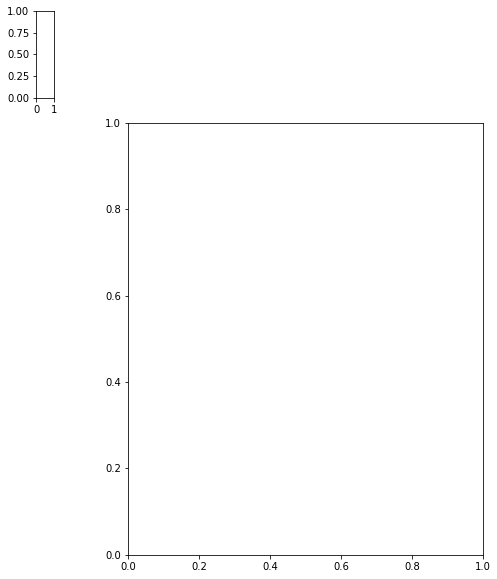

In [17]:
plot_correlation_clustermap( df_overall_corr, figsize=(8,10) );